# From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
#importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [3]:
#loading the dataset
iris = datasets.load_iris()

In [4]:
dataset = pd.DataFrame(iris['data'])

In [5]:
dataset.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


We will be using Kmeans algorithm

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

So we will run the Kmeans algo for a range k

In [6]:
mylist=[]
K = range(1,10)
for i in K:
    kmeans_model = KMeans(n_clusters=i)
    kmeans_model.fit(dataset)
    mylist.append(kmeans_model.inertia_)

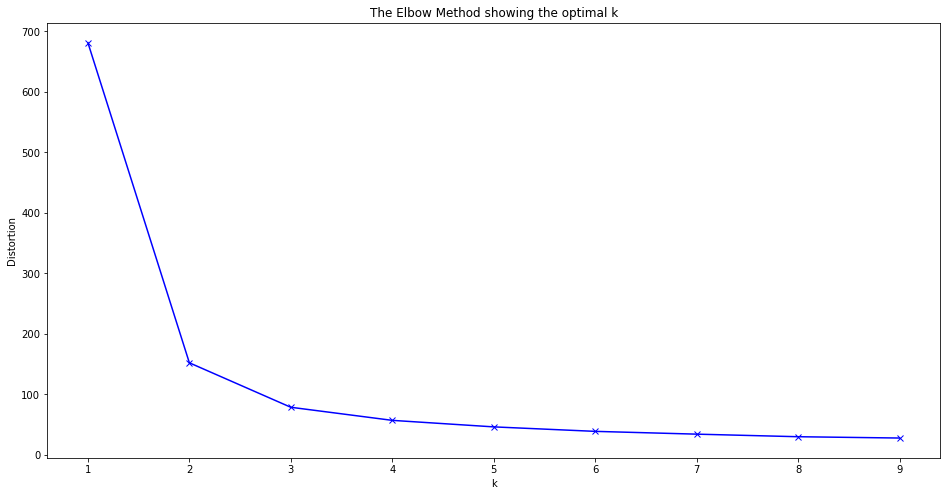

In [7]:
plt.figure(figsize=(16,8))
plt.plot(K, mylist, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

number of clusters = 3 is ok

In [8]:
KmeansModel = KMeans(n_clusters=3)

In [9]:
KmeansModel.fit(dataset)

KMeans(n_clusters=3)

Text(0.5, 1.0, 'K_Means')

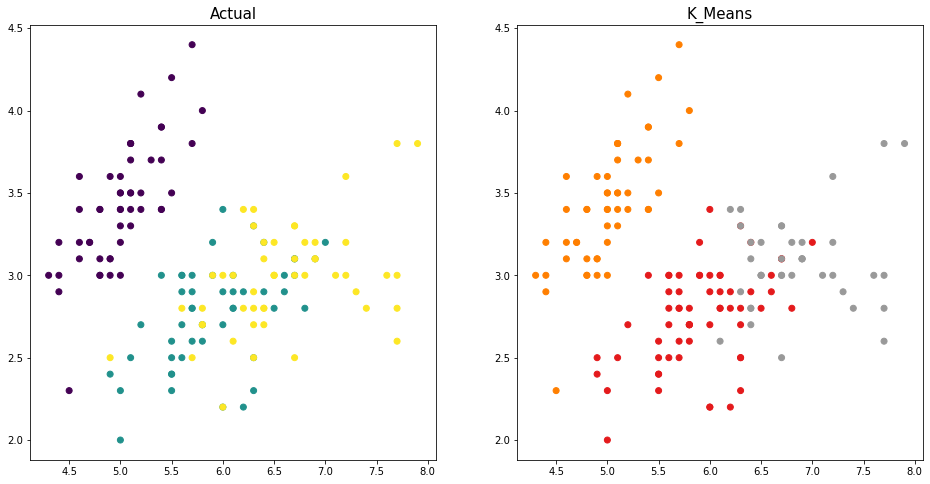

In [10]:
dataset['k_means']=KmeansModel.predict(dataset)
dataset['target']=iris['target']
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(dataset[0], dataset[1], c=dataset['target'])
axes[1].scatter(dataset[0], dataset[1], c=dataset['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=15)
axes[1].set_title('K_Means', fontsize=15)